In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

np.random.seed(0)

In [4]:
(X_train, y_train), (X_test, y_test)= mnist.load_data() 

In [5]:
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


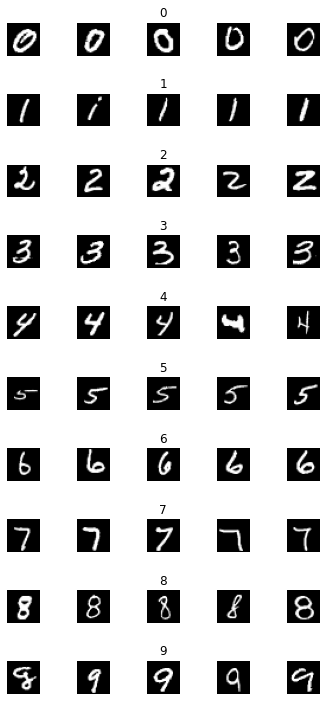

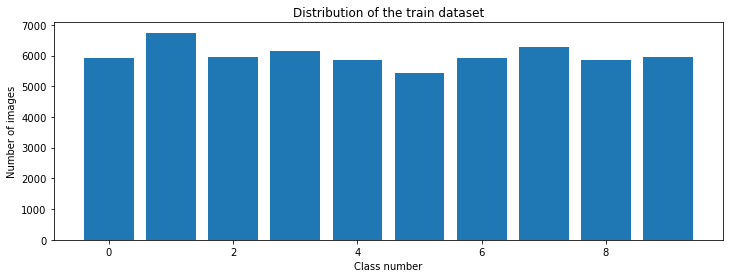

In [6]:
 
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))


print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 

In [7]:
# Earlier in MLP, we reshape it by (60000,784) but in CNN we leave it (60000, 28, 28) where 1 is the depth.
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
# define the lenet model funciton
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu', strides=1)) # where 30 is number of filters and 5,5 is the filter size. There is other arguement called padding which can take any one of (valid, same, casual) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.5)) # 50 % of neurons, connections will be dropped. Dropouts are used to reduce overfitting. This Dropout can be placed between any layer. However, it is usual to place where the number of parameters are high.
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [11]:
model = leNet_model()
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
______________________________________

In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 25s 469us/step - loss: 0.2235 - accuracy: 0.9296 - val_loss: 0.0496 - val_accuracy: 0.9837
Epoch 2/10
54000/54000 [==============================] - 25s 467us/step - loss: 0.0671 - accuracy: 0.9792 - val_loss: 0.0557 - val_accuracy: 0.9835
Epoch 3/10
54000/54000 [==============================] - 27s 493us/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0365 - val_accuracy: 0.9888
Epoch 4/10
54000/54000 [==============================] - 27s 491us/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0340 - val_accuracy: 0.9900
Epoch 5/10
54000/54000 [==============================] - 27s 492us/step - loss: 0.0435 - accuracy: 0.9859 - val_loss: 0.0367 - val_accuracy: 0.9908
Epoch 6/10
54000/54000 [==============================] - 28s 516us/step - loss: 0.0387 - accuracy: 0.9884 - val_loss: 0.0415 - val_accuracy: 0.9885
Epoch 7/10
54000/54000 [==============================] 

Text(0.5, 0, 'epoch')

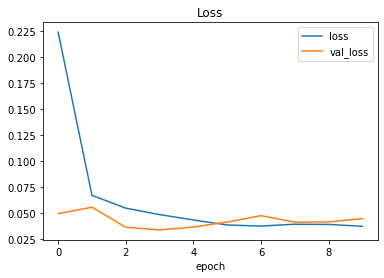

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

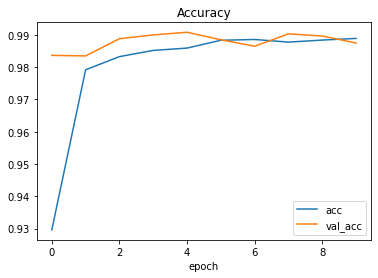

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.049739037310874666
Test accuracy: 0.9847999811172485


In [16]:
import requests
from PIL import Image
import cv2

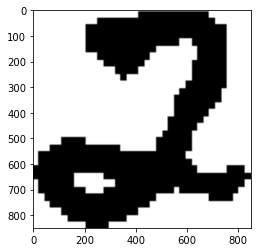

In [20]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

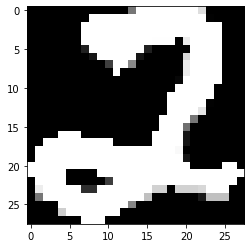

In [21]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28)) # our network was trained on 28*28 images.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # our network was trauend  
img = cv2.bitwise_not(img) # subtracts every entry from 255 ; To make background black and digit white so as to match with the train image.
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [22]:
img = img/255
img = img.reshape(1, 28, 28, 1)


In [23]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))


predicted digit: [2]


In [24]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

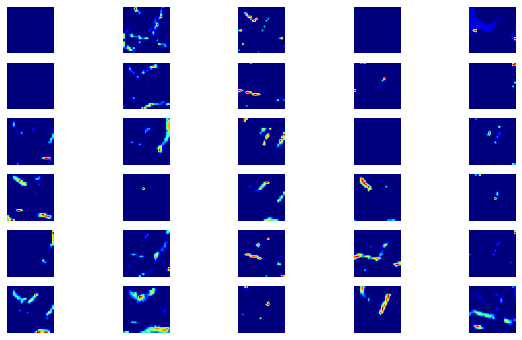

In [25]:
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(6, 5, i+1) # to fit 30 images
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

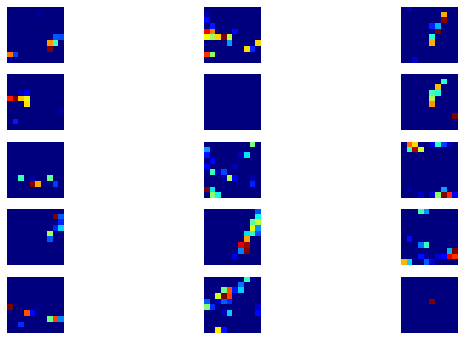

In [26]:
plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(5, 3, i+1) # to fit 30 images
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')